# Multimodal Application

In [ ]:
!pip install anthropic==0.42.0

In [ ]:
from anthropic import Anthropic

In [ ]:
from google.colab import userdata

anthropic_api_key = userdata.get('Anthropic_API')


In [ ]:
client = Anthropic(api_key=anthropic_api_key)
MODEL_NAME="claude-3-5-sonnet-20241022"

## Content Blocks

## Image Prompts

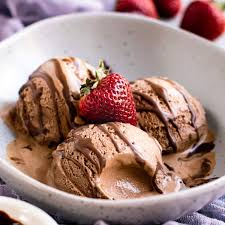

In [ ]:
from IPython.display import Image
Image(filename='/content/icecream.jpg')

## Image Messages

In [ ]:
import base64
# opens the image file in "read binary" mode
with open("/content/icecream.jpg", "rb") as image_file:
    #reads the contents of the image as a bytes object
    binary_data = image_file.read()
    #encodes the binary data using Base64 encoding
    base_64_encoded_data = base64.b64encode(binary_data)
    #decodes base_64_encoded_data from bytes to a string
    base64_string = base_64_encoded_data.decode('utf-8')

In [ ]:
base64_string[:100]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhMSExMVFhUXFxcVFxgYGBgaFhcYFRcWFxcVGBUYHSggGBolHRUVIjEhJSkr'

In [ ]:
messages = [
    {
        "role": "user",
        "content": [{
            "type": "image",
            "source": {
                "type": "base64",
                "media_type": "image/jpeg",
                "data": base64_string
            },
        },
        {
            "type": "text",
            "text": """How many scoops of icecream are there in this image?"""
        }]
    }
]

In [ ]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

In this image, there appear to be 3 scoops of chocolate ice cream served in a white bowl, garnished with a fresh strawberry on top. The ice cream appears to be rich and creamy chocolate flavor, with a smooth, velvety texture.


## Image Block Helper Function

In [ ]:
import base64
import mimetypes

def create_image_message(image_path):
    # Open the image file in "read binary" mode
    with open(image_path, "rb") as image_file:
        # Read the contents of the image as a bytes object
        binary_data = image_file.read()
    # Encode the binary data using Base64 encoding
    base64_encoded_data = base64.b64encode(binary_data)
    # Decode base64_encoded_data from bytes to a string
    base64_string = base64_encoded_data.decode('utf-8')
    # Get the MIME type of the image based on its file extension
    mime_type, _ = mimetypes.guess_type(image_path)
    # Create the image block
    image_block = {
        "type": "image",
        "source": {
            "type": "base64",
            "media_type": mime_type,
            "data": base64_string
        }
    }


    return image_block

## A Real World Use Case

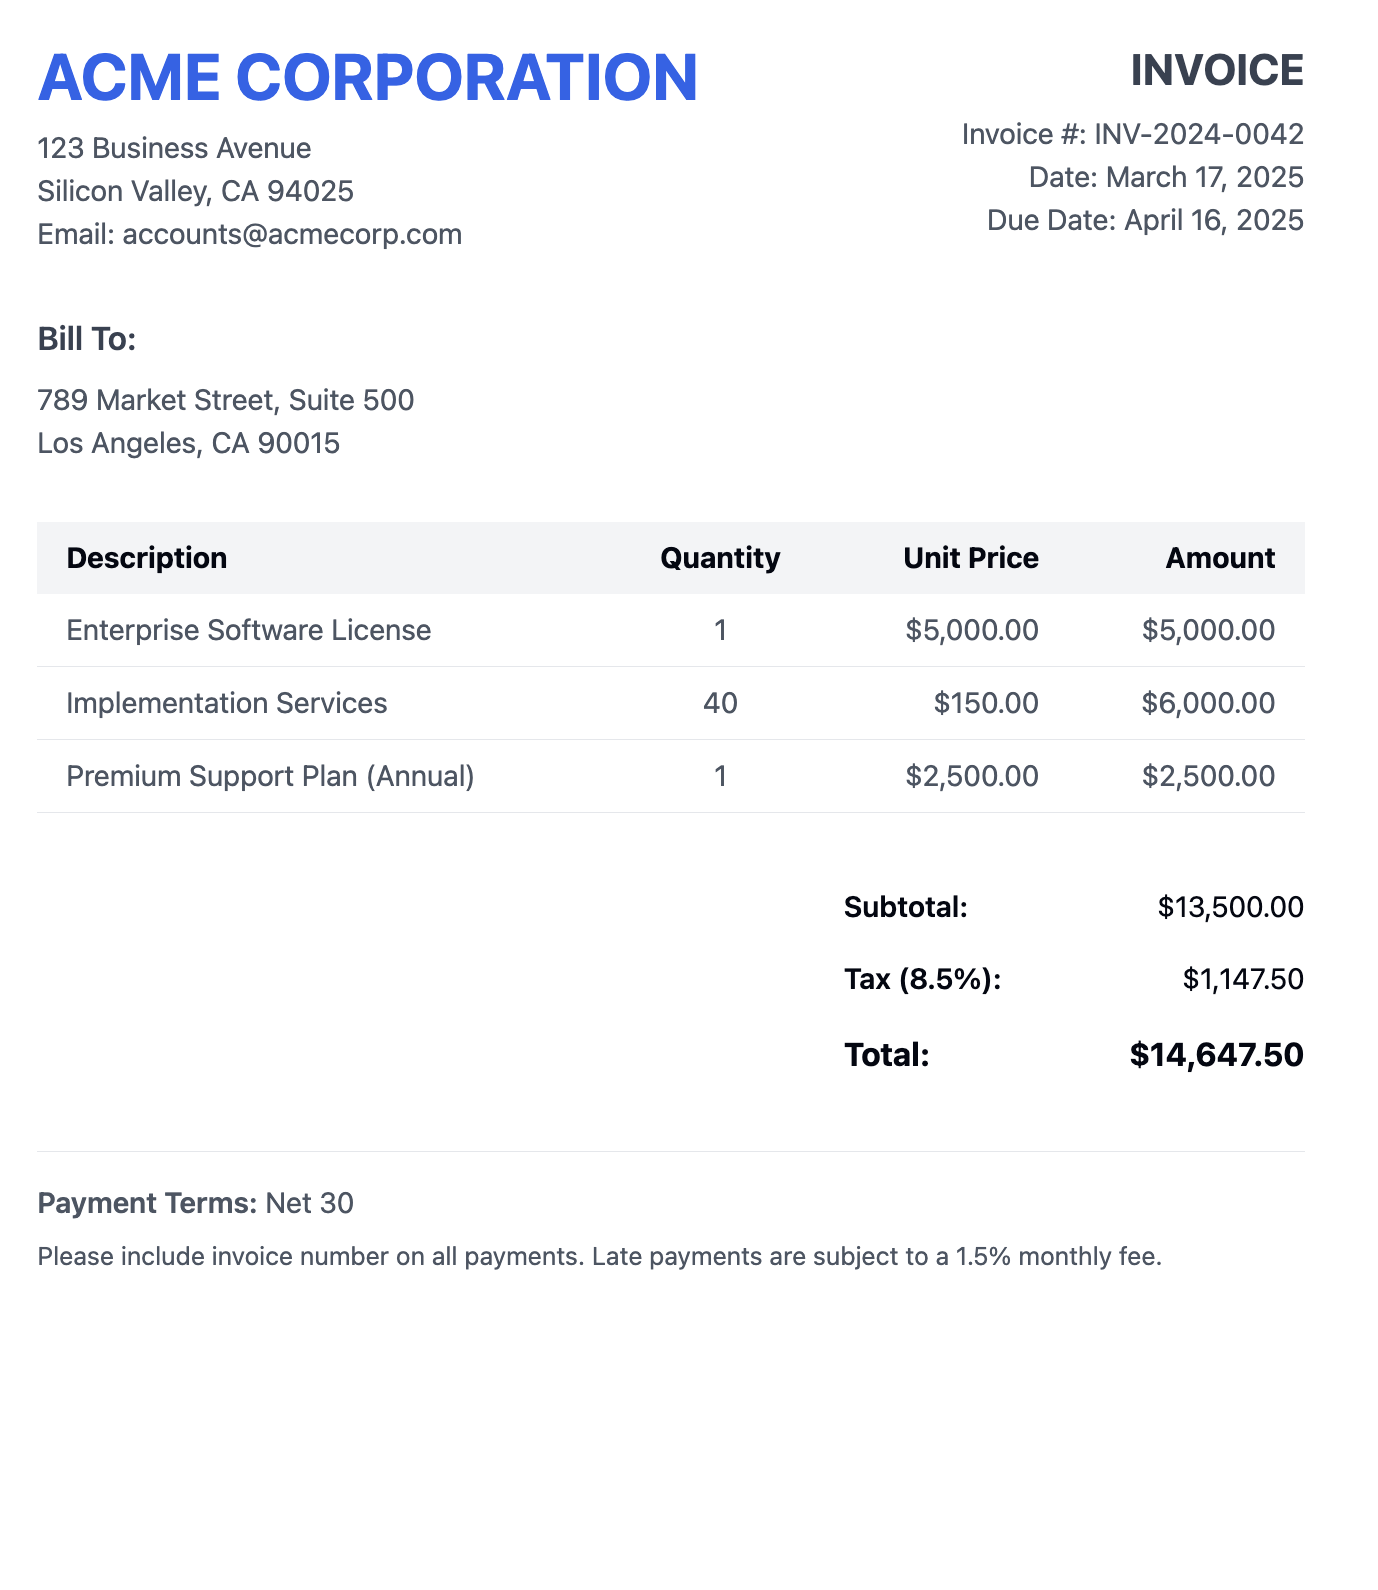

In [ ]:
Image(filename='/content/invoice - multimodality.png')

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message("/content/invoice - multimodality.png"),
            {"type": "text", "text": """
                Generate a JSON object representing the contents
                of this invoice.  It should include all dates,
                dollar amounts, and addresses.
                Only respond with the JSON itself.
            """
            }
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=messages
)
print(response.content[0].text)

{
  "invoiceNumber": "INV-2024-0042",
  "issueDate": "March 17, 2025",
  "dueDate": "April 16, 2025",
  "from": {
    "company": "ACME CORPORATION",
    "address": "123 Business Avenue",
    "city": "Silicon Valley",
    "state": "CA",
    "zip": "94025",
    "email": "accounts@acmecorp.com"
  },
  "billTo": {
    "address": "789 Market Street, Suite 500",
    "city": "Los Angeles",
    "state": "CA",
    "zip": "90015"
  },
  "items": [
    {
      "description": "Enterprise Software License",
      "quantity": 1,
      "unitPrice": 5000.00,
      "amount": 5000.00
    },
    {
      "description": "Implementation Services",
      "quantity": 40,
      "unitPrice": 150.00,
      "amount": 6000.00
    },
    {
      "description": "Premium Support Plan (Annual)",
      "quantity": 1,
      "unitPrice": 2500.00,
      "amount": 2500.00
    }
  ],
  "subtotal": 13500.00,
  "taxRate": 8.5,
  "taxAmount": 1147.50,
  "total": 14647.50,
  "paymentTerms": "Net 30",
  "lateFee": "1.5% monthly"